<a href="https://colab.research.google.com/github/manavbillimoria/smart-city-bus-monitoring/blob/main/bus-monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('bus_transport_data.csv')

# Display basic information about the dataset
print(data.head())
print(data.info())


  route stop_from stop_to      time  travel_time  passenger_count  temperature
0     A     Stop1   Stop2  08:00:00           15               30           25
1     A     Stop2   Stop3  08:15:00           20               25           26
2     A     Stop3   Stop4  08:30:00           18               40           27
3     A     Stop4   Stop5  08:45:00           22               35           28
4     A     Stop5   Stop6  09:00:00           17               28           28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   route            176 non-null    object
 1   stop_from        176 non-null    object
 2   stop_to          176 non-null    object
 3   time             176 non-null    object
 4   travel_time      176 non-null    int64 
 5   passenger_count  176 non-null    int64 
 6   temperature      176 non-null    int64 
dtypes: int64(3),

       travel_time  passenger_count  temperature
count   176.000000       176.000000    176.00000
mean     15.471591        25.869318     32.37500
std       3.118478         5.463643      2.91719
min      10.000000        15.000000     25.00000
25%      13.000000        21.750000     30.00000
50%      15.000000        25.000000     33.00000
75%      18.000000        29.000000     35.00000
max      25.000000        40.000000     36.00000


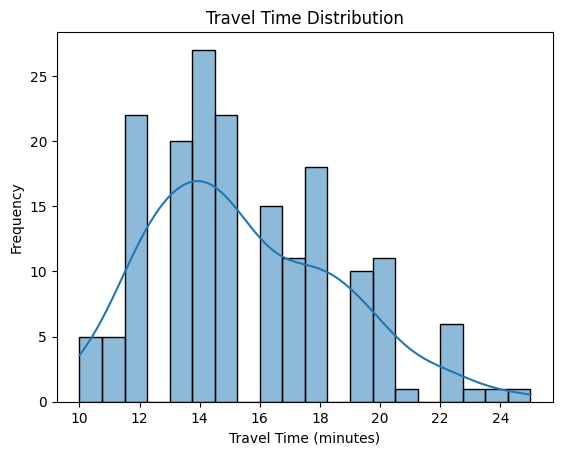

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(data.describe())

# Visualize travel time distribution
sns.histplot(data['travel_time'], bins=20, kde=True)
plt.title('Travel Time Distribution')
plt.xlabel('Travel Time (minutes)')
plt.ylabel('Frequency')
plt.show()


In [5]:
# Convert time to numeric feature (e.g., minutes since midnight)
data['time_numeric'] = data['time'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# Create binary feature for peak hours
data['is_peak'] = data['time_numeric'].apply(lambda x: 1 if (x >= 420 and x <= 600) or (x >= 900 and x <= 1080) else 0)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Select features and target variable
X = data[['time_numeric', 'is_peak', 'temperature']]
y = data['travel_time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f} minutes')


Mean Absolute Error: 2.55 minutes


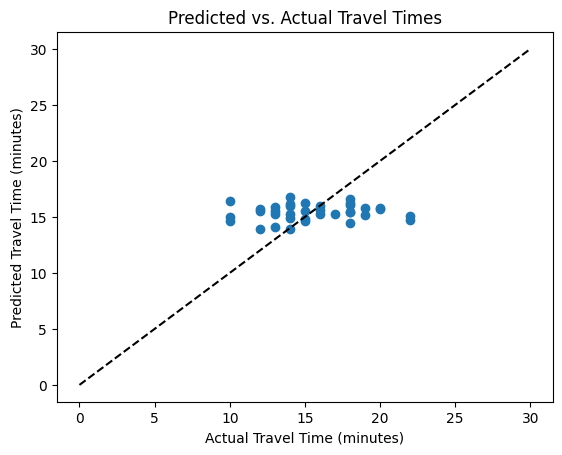

In [7]:
# Visualize predicted vs. actual travel times
plt.scatter(y_test, y_pred)
plt.plot([0, 30], [0, 30], '--k')
plt.xlabel('Actual Travel Time (minutes)')
plt.ylabel('Predicted Travel Time (minutes)')
plt.title('Predicted vs. Actual Travel Times')
plt.show()


In [8]:
# Scenario: Predict travel time for a specific route and time of day
scenario_data = pd.DataFrame({
    'time_numeric': [540],  # 9:00 AM
    'is_peak': [1],
    'temperature': [28]
})

predicted_travel_time = model.predict(scenario_data)
print(f'Predicted Travel Time: {predicted_travel_time[0]:.2f} minutes')


Predicted Travel Time: 15.76 minutes
